In [1]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
import json

In [21]:
with open("..\data\json\CHEMISTRY.json", "r") as f:
    d = json.load(f)

#Replace MCQ responses with actual answer
for i in range(len(d) - 1):
    try:
        if "Options" in d[i].keys():
            letter = d[i]['Answer']
            d[i]['Answer'] = d[i]["Options"][letter]
            del d[i]['Options']
    except:
        d.pop(i)

In [22]:
df = pd.DataFrame(d)
df.head()

,Number,Subject,Type,Question,Answer
0,2,CHEMISTRY,Multiple Choice,An aqueous solution in which the concentration...,basic
1,9,CHEMISTRY,Short Answer,What general type of bonding is found in molec...,COVALENT
2,9,CHEMISTRY,Short Answer,Name all of the following 4 processes where la...,EVAPORATION; WATER MELTS
3,16,CHEMISTRY,Multiple Choice,"Which of the following is a metallic element, ...",iron
4,16,CHEMISTRY,Short Answer,"In general, metals are relatively hard except ...",ONE


In [23]:
df["Answer"] = df['Answer'].apply(lambda x: x.strip('_ ').upper())
ansrs = dict(df['Answer'].value_counts())
ansrs = {i:ansrs[i] for i in ansrs if str(i).isalpha()} 
pd.Series(ansrs).head(10)

HELIUM        7
FLUORINE      5
WATER         5
BENZENE       5
HYDROGEN      5
OXYGEN        4
AMMONIA       4
IRON          4
OCTAHEDRAL    3
SUCROSE       3
dtype: int64

array([<AxesSubplot:ylabel='None'>], dtype=object)

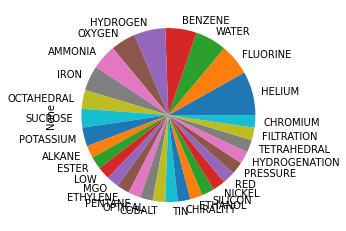

In [28]:
pd.Series(ansrs).head(30).plot(kind='pie', subplots=True)

In [29]:
words = []
for i in list(df['Question']):
    words.extend([j.strip('()1234?_,').lower() for j in i.split(' ')])
words = pd.Series(words)
words.value_counts().head(10)

the          1908
of           1535
is            762
              726
a             701
following     567
in            521
which         491
to            476
what          343
dtype: int64

In [30]:
nltk.download('stopwords')
s = set(stopwords.words('english'))
counts = dict(words.value_counts())

for i in list(counts):
    if i in s or i in ('following', '', 'name', 'would', 'as:'):
        del counts[i]

pd.Series(counts).head(15)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iamam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


reaction    118
gas         117
molar        97
water        92
acid         87
solution     86
one          74
two          73
per          72
many         71
number       71
pressure     70
+            64
hydrogen     59
mole         58
dtype: int64

array([<AxesSubplot:ylabel='None'>], dtype=object)

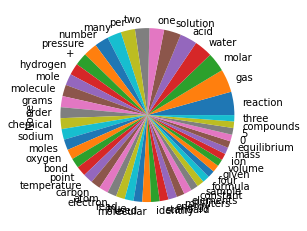

In [31]:
pd.Series(counts).head(50).plot(kind='pie', subplots=True)